### Logistic Regression

#### predict whether the patient will suffer with hearing disabilities

In [29]:
# pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [30]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load the data
df=pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### EDA

In [32]:
# getting statistical information about the df
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [33]:
# getting general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [34]:
# check the number of NA values
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [35]:
# correlation
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

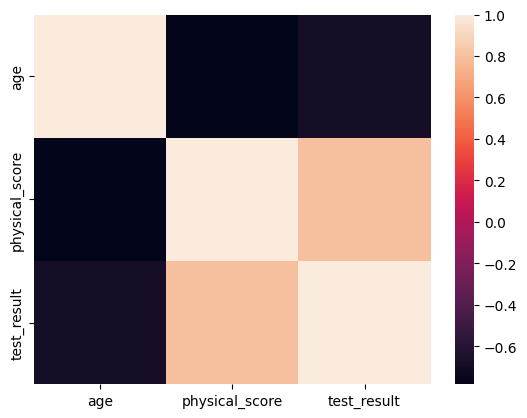

In [36]:
sns.heatmap(df.corr())

### split the data

In [37]:
# split the data for training and test

# create x
x=df.drop('test_result',axis =1)

# create y
y=df['test_result']

In [38]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

## model building

### Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

# create the model
model_linear_regression = LinearRegression()

# train the model
model_linear_regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegressionCV

# create the model
model_logistic_regression=LogisticRegressionCV()

# train the model
model_logistic_regression.fit(x_train,y_train)

,Cs,10
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


In [41]:
y_pred = model_logistic_regression.predict(x_test)

### Performance metrics

In [42]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[332,  61],
       [ 31, 576]])

In [43]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy =accuracy_score(y_test,y_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 90.80%


In [44]:
from sklearn.metrics import precision_score

# precision
pre_score = precision_score(y_test,y_pred)
print(f"precision = {pre_score * 100:.2f}%")

precision = 90.42%


In [45]:
from sklearn.metrics import recall_score

# recall
re_score = recall_score(y_test,y_pred)
print(f"recall = {re_score * 100:.2f}%")

recall = 94.89%


In [46]:
from sklearn.metrics import f1_score

# f1 score
f_score = f1_score(y_test,y_pred)
print(f"f1_score = {f_score* 100:.2f}%")

f1_score = 92.60%
